# A1: Logic and lambda calculus

In [1]:
%%html
<style>
.comment {
  color: magenta;
}
</style>

Simon Dobnik and Robin Cooper

The lab is an exploration and learning exercise to be done in a group and also in discussion with the teachers and other students.

Before starting, please read the instructions on how to work in groups on Canvas.

Write all your answers and the code in the appropriate boxes below.

*Important*: We recommend that you create a virtual environment (either with virtualenv or conda), install Jupyter Lab in it and all dependencies used in the assignment.
To run Jupyter Lab later within your environment, run the following command:

```python -m ipykernel install --user --name=my-virtualenv-name```,

where you replace `my-virtualenv-name` with the name of your created environment.
Once in Jupyter, choose the kernel with the name of your environment. You can do it by either (i) using the drop-down menu in the top right corner or (ii) going to the top menu -> Kernel -> Change Kernel.

## Translating English to logic and evaluating logic in a model

In [2]:
# This task needs NLTK and Jupyter Lab (IPython package).
import nltk
from utils import display_latex, display_translation, display_tree, display, Markdown
read_expr = nltk.sem.Expression.fromstring
import sys

### 1. Propositional logic
Translate the following sentences into **propositional logic** and verify that they parse with Expression.fromstring() (`read_expr` variable in the cell above). Provide a key which shows how the propositional variables in your translation correspond to expressions of English. Briefly discuss any difficulties you encounter. (By difficulties we mean cases where the semantics of English expressions cannot be expressed to the same degree by the semantics of your logic representations, i.e. they do not mean the same). **[<span class="comment">5/</span>5 + 1 marks]**

In [3]:
propositions = {

    # AP = Alex plays the piano
    # AS = Alex is smart
    # AM = Alex is musical
    # GM = George is musical
    # LS = Lydia is smart
    # L = Lydia is happy
    # P = George plays the piano

    "If Alex plays the piano, she is smart.":
    read_expr('(AP -> AS)'),
    
    "Alex is both smart and musical.":
    read_expr('AS & AM'),
    
    "If Alex is not smart, Lydia is not happy.":
    read_expr('- AS -> - L'),
    
    "If Alex or George plays the piano, they are musical.":
    read_expr('(P | AP) -> (AM & GM)'),
    
    "George plays the piano.":
    read_expr('P'),
}

for text, semrep in propositions.items():
    display_translation(text, semrep)

"If Alex plays the piano, she is smart.": $(AP\ \rightarrow\ AS)$

"Alex is both smart and musical.": $(AS\ \land\ AM)$

"If Alex is not smart, Lydia is not happy.": $(-AS\ \rightarrow\ -L)$

"If Alex or George plays the piano, they are musical.": $((P\ \lor\ AP)\ \rightarrow\ (AM\ \land\ GM))$

"George plays the piano.": $P$

*Difficulties encountered:*

This was discussed: do 'she' and 'they' refer to the same people that were mentioned? <span class="comment">this is called "anaphoric reference", and indeed it can cause ambiguity!</span>

<div class="comment">
can you think of any other ways to interpret (4)? there is an ambiguity involved (collective vs. distributed reading). the one you have translated here makes sense syntactically, but if you think about the meaning, it is a bit strange (if _either_ of them play the piano, they are _both_ musical)
</div>

### 2. Valuation of Propositional logic

Imagine that we observe a world where 
- (i) Alex does not play the piano,
- (ii) Alex and Lydia are smart and musical,
- (iii) George is not musical,
- (iv) Lydia is happy,
- (v) George plays the piano. 

Translate this informal description of the world into a model by appropriately defining an evaluation function and evaluate the formulae from Question 1 in this model. Briefly comment the answers you get. **[<span class="comment">6/</span>5 + 1 marks]**.

In [4]:
# AP = Alex plays the piano
# AS = Alex is smart
# AM = Alex is musical
# GM = George is musical
# LS = Lydia is smart
# L = Lydia is happy
# P = George plays the piano


val = nltk.Valuation([('AP', False), ('AS', True), ('AM', True), ('GM', False), ('LS', True), ('L', True), ('P', True)])
dom = set([]) # There are no individuals in propositional logic
g = nltk.Assignment(dom) # There are also no variables and hence assignments
m = nltk.Model(dom, val)

print(m.evaluate('AP -> AS', g)) #should be True
print(m.evaluate('AS & AM', g)) # should be True
print(m.evaluate('-AS ->- L', g)) # should be True
print(m.evaluate('(P | AP) -> (AM & GM)', g)) # should be False?
print(m.evaluate('P', g)) # should be True



True
True
True
False
True


*Comments:*

We had somes issues with the evaluation of the propositional formulae - especially with the ambiguity of the sentence "If Alex or George plays the piano, they are musical." 

### 3. Predicate logic *without quantifiers*

Translate the following sentences into predicate-argument formulae of First Order Logic and verify that they parse with `Expression.fromstring()`. Briefly discuss any difficulties you encounter. **[<span class="comment">5/</span>4 + 1 marks]**

In [5]:
sentences1 = {
    "Lydia likes George but Lydia doesn't like Alex": 
    read_expr(r'like(Lydia,George)&-like(Lydia,Alex)'),
    
    "Lydia likes herself and so does George":
    read_expr(r'(like(Lydia,Lydia)&like(George,George))|(like(Lydia,Lydia)& like(George,Lydia))'),
    
    "Charlie is an English pianist who plays a sonata":
    read_expr(r'English(Charlie)&pianist(Charlie)&play(Charlie,sonata)'),
    
    "Lydia and George admire each other":
    read_expr(r'admire(Lydia,George)&admire(George,Lydia)'),
}

for text, semrep in sentences1.items():
    display_translation(text, semrep)


"Lydia likes George but Lydia doesn't like Alex": $(like(Lydia,George)\ \land\ -like(Lydia,Alex))$

"Lydia likes herself and so does George": $((like(Lydia,Lydia)\ \land\ like(George,George))\ \lor\ (like(Lydia,Lydia)\ \land\ like(George,Lydia)))$

"Charlie is an English pianist who plays a sonata": $(English(Charlie)\ \land\ pianist(Charlie)\ \land\ play(Charlie,sonata))$

"Lydia and George admire each other": $(admire(Lydia,George)\ \land\ admire(George,Lydia))$

*Difficulties encountered:*

Ambiguities: does George like Lydia or himself?

### 4. First order logic with quantifiers

Translate the following sentences into quantified formulas of First Order Logic and verify that they parse with `Expression.fromstring()`. Briefly discuss any difficulties you encounter. **[<span class="comment">3/</span>4 + 1 marks]**

In [6]:
sentences2 = {
    "Charlie knows a woman who likes George":
    read_expr('exists x.(woman(x) & know(Charlie,x) & like(x,George))'),
    
    "George admires everybody and Lydia admires nobody":
    read_expr('all x.admire(George,x) & -exists y.admire(Lydia,y)'),

    "Nobody admires everybody":
    read_expr('-exists x. all y.admire(x,y)'),
    
    "Exactly one musician plays everything Alex wrote":
    read_expr('exists x. musician(x) & all y. (write(Alex,y) & play(x,y))'),
}

for text, semrep in sentences2.items():
    display_translation(text, semrep)

"Charlie knows a woman who likes George": $\exists\ x.(woman(x)\ \land\ know(Charlie,x)\ \land\ like(x,George))$

"George admires everybody and Lydia admires nobody": $(\forall\ x.admire(George,x)\ \land\ -\exists\ y.admire(Lydia,y))$

"Nobody admires everybody": $-\exists\ x.\forall\ y.admire(x,y)$

"Exactly one musician plays everything Alex wrote": $(\exists\ x.musician(x)\ \land\ \forall\ y.(write(Alex,y)\ \land\ play(x,y)))$

*Difficulties encountered:*

-Nobody admires eveerybody was a tricky one that we spend some time discussing.
-How to translate "exactly one" in logic was also challenging and our solution is not complete. This could possibly be solved thinking about it this way: there is one musician who plays everything Alex wrote, and if there is another musician, they do not play everything Alex wrote. 

<div class="comment">nice job working out "nobody admires everybody". 

the intuition for "exactly one" is good. hint: you need to use `=` and the formula involves a lot of repetition. I'm not sure if it helps, but you colud try literally translating "a musician plays everything alex wrote and for all musicians if they play everything alxex wrote then they are that musician"
</div>

### 5. Valuation of first order logic

We observe a world with entities Lydia, George, Alex, Charlie and Bertie, sonata, etude, prelude, waltz, scherzo.

1. Lydia likes Lydia, George, Alex and Charlie. George likes Lydia, Bertie and George. Alex likes Alex. Charlie likes Lydia, George, Alex, Charlie and Bertie. Bertie likes Alex.
2. Lydia, George, Alex, Charlie and Bertie are English.
3. Charlie and Bertie are pianists.
4. Charlie plays a sonata, an etude and a waltz. Bertie plays a waltz and a scherzo. Lydia plays an etude, a prelude and a waltz.
5. Lydia admires Lydia, Charlie and Bertie. George admires Lydia, George, Alex, Charlie and Bertie. Alex admires Lydia, Alex and Bertie. Charlie admires George and Bertie. Bertie admires Lydia, George, Alex, Charlie and Bertie.
6. Lydia knows Lydia, George, Alex, Charlie and Bertie. George knows Lydia, George and Bertie. Alex knows Lydia, Alex and Bertie. Charlie knows George, Charlie and Bertie. Bertie knows Lydia, George, Alex, Charlie and Bertie.
7. Lydia, Alex and Charlie are women.
8. George and Bertie are men.
9. Alex wrote a sonata, an etude an a waltz.
10. Lydia, Alex, Charlie and Bertie are musicians.

Translate this informal description of the world into a model and evaluate the formulae from Questions 3 and 4 in this model. Briefly comment on the answers you get **[<span class="comment">3/</span>3 + 2 marks]**.

In [7]:
entities = set(['l','g','a','c','b','s','e','p','w','sc']) #the model's domain, semantics objects that go in the model

assign = """
Lydia => l
George => g
Alex => a
Charlie => c
Bertie => b
sonata => s
etude => e
prelude => p
waltz => w
scherzo => sc
like => {(l,l), (l,g), (l,a), (l,c), (g,l), (g,b), (g,g), (a,a), (c,l), (c,g), (c,a), (c,c), (c,b), (b,a)} 
know => {(l,l),(l,g),(l,a),(l,c),(l,b), (g,l), (g,g),(g,b), (a,l), (a,a), (a,b), (c,g), (c,c), (c,b), (b,c), (b,g), (b,a), (b,c), (b,b)}
admire => {(l,l), (l,c), (l,b), (g,l), (g,g), (g,b), (a,l),(a,a), (a,b),(c,g),(c,b),(b,l),(b,g),(b,a), (b,c),(b,b)}
play => {(c,s), (c,e), (c,w), (b,w), (b,sc), (l,e), (l,p), (l,w)}
English => {l,g,a,c,b}
pianist => {c,b}
woman => {l, a, c}
men => {g,b}
write => {(a,s),(a,e),(a,w)}
musician => {l,a,c,b}
"""

val2 = nltk.Valuation.fromstring(assign)
#print(val2)

g2 = nltk.Assignment(entities)
m2 = nltk.Model(entities, val2)



# sentences from question 3
for text, semrep in sentences1.items():
    print(m2.evaluate(str(semrep), g2))
    display_latex(semrep)
    display(Markdown('----'))

# sentences from question 4
for text, semrep in sentences2.items():
    print(m2.evaluate(str(semrep), g2))
    display_latex(semrep)
    display(Markdown('----'))


False


$(like(Lydia,George)\ \land\ -like(Lydia,Alex))$

----

True


$((like(Lydia,Lydia)\ \land\ like(George,George))\ \lor\ (like(Lydia,Lydia)\ \land\ like(George,Lydia)))$

----

True


$(English(Charlie)\ \land\ pianist(Charlie)\ \land\ play(Charlie,sonata))$

----

False


$(admire(Lydia,George)\ \land\ admire(George,Lydia))$

----

True


$\exists\ x.(woman(x)\ \land\ know(Charlie,x)\ \land\ like(x,George))$

----

False


$(\forall\ x.admire(George,x)\ \land\ -\exists\ y.admire(Lydia,y))$

----

True


$-\exists\ x.\forall\ y.admire(x,y)$

----

Undefined


$(\exists\ x.musician(x)\ \land\ \forall\ y.(write(Alex,y)\ \land\ play(x,y)))$

----

*Comments on the answers:*

We had some issues with understanding the difference between entities/variables and real-life referents. We got undefined before we realized that the logic formulas take the full names instead of the entities. We also had to go back to uniform all the verb forms (tense, person) so that the formula matches the model.

<div class="comment">
Variables and constants are the syntactic objects (they can appear in formulas), whereas entities are the semantic objects (they only appear in the domain of the model and in the range of the valuation functions)

Tense is tough (you see it a bit more in the next part) because the english _run_ and _ran_ express the same predicate, in first-order logic we use the same predicate symbol (`Run` or `R` or whatever you want it to be). If you want to capture the difference in meaning between _John ran_ and _John runs_ you need to use something more complex than what we have here -- though there are versions of tense logic that are based on first-order logic.

All of the translations are correct except the last one. There is a scope issue which leaves the `x` in `play(x,y)` unassigned -- also I think the relation between write and play predicates should be conditional, not conjunction.
</div>


## Lambda calculus

In [8]:
from nltk.grammar import FeatureGrammar

### 6. Function application and $\beta$-reduction
In the following examples some code has been deleted and replaced with `<????>`. What has been deleted? Verify that your answer is correct. **[<span class="comment">1/</span>4 marks]**

In [9]:
e1 = read_expr(r'\x.like(x,rob)')
e2 = read_expr(r'pip')
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with result like(pip,rob).
display_latex(read_expr(r"like(pip,rob)"))

e1 = read_expr(r'pip')
e2 = read_expr(r'\x.play(x,scherzo)') 
e3 = nltk.sem.ApplicationExpression(e1,e2)
display_latex(e3.simplify())
# with result play(pip,scherzo).
display_latex(read_expr(r"play(pip,scherzo)"))

e1 = read_expr(r'exists x.(woman(x) & play(x,etude))')
e2 = read_expr(r'\x.play(x,etude)') 
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with result exists x.(woman(x) & play(x,etude)).
display_latex(read_expr(r"exists x.(woman(x) & play(x,etude))"))

e1 = read_expr(r' \x.all z2.(musician(z2) -> like(x,z2))')
e2 = read_expr(r'\P.all x. (musician(x) -> P(x))') 
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with result \x.all z2.(musician(z2) -> like(x,z2)).
display_latex(read_expr(r"\x.all z2.(musician(z2) -> like(x,z2))"))

$like(pip,rob)$

$like(pip,rob)$

$pip(\lambda\ x.play(x,scherzo))$

$play(pip,scherzo)$

$\exists\ x.(woman(x)\ \land\ play(x,etude))(\lambda\ x.play(x,etude))$

$\exists\ x.(woman(x)\ \land\ play(x,etude))$

$\forall\ z_{2}.(musician(z_{2})\ \rightarrow\ like(\lambda\ P.\forall\ x.(musician(x)\ \rightarrow\ P(x)),z_{2}))$

$\lambda\ x.\forall\ z_{2}.(musician(z_{2})\ \rightarrow\ like(x,z_{2}))$


<div class="comment"> 
    
for (2)you should be able to get back $play(pip, scherzo)$. 
    
this one is a bit tricky, but it is possible. hint: e1 needs to be a lambda expression as well -- can you devise a lamba expression that makes it looks like item (1) when you reduce?

I will make a post about these on Canvas
</div>

### 7. Extending the grammar

Extend the grammar simple_sem.fcfg that comes with NLTK `(~/nltk_data/grammars/book_grammars/)` so that it will cover the following sentences:

- no man gives a bone to a dog **[<span class="comment">4/</span>4 marks]**
- no man gives a bone to the dog **[<span class="comment">4/</span>4 marks]**
- a boy and a girl chased every dog **[<span class="comment">0/</span>2 marks]**
- every dog chased a boy and a girl **[<span class="comment">0/</span>2 marks]**
- a brown cat chases a white dog **[<span class="comment">4/</span>4 marks]**

The last example includes adjectives. Several different kinds of adjectives are discussed in the literature [(cf. Kennedy, 2012)](http://semantics.uchicago.edu/kennedy/docs/routledge.pdf). In this example we have an intersective adjective. The denotiation we want for "brown cat" is a a set that we get by intersecting the set of individuals that are brown and the set of individuals that are cats.

C. Kennedy. Adjectives. In G. Russell, editor, The Routledge Companion to Philosophy of Language, chapter 3.3, pages 328–341. Routledge, 2012.

The original grammar is included in the code below as a string.

In [10]:
# fcfg_string_orginal = r"""
# % start S
# ############################
# # Grammar Rules
# #############################

# S[SEM = <?subj(?vp)>] -> NP[NUM=?n,SEM=?subj] VP[NUM=?n,SEM=?vp]

# NP[NUM=?n,SEM=<?det(?nom)> ] -> Det[NUM=?n,SEM=?det]  Nom[NUM=?n,SEM=?nom]
# NP[LOC=?l,NUM=?n,SEM=?np] -> PropN[LOC=?l,NUM=?n,SEM=?np]

# Nom[NUM=?n,SEM=?nom] -> N[NUM=?n,SEM=?nom]

# VP[NUM=?n,SEM=?v] -> IV[NUM=?n,SEM=?v]
# VP[NUM=?n,SEM=<?v(?obj)>] -> TV[NUM=?n,SEM=?v] NP[SEM=?obj]
# VP[NUM=?n,SEM=<?v(?obj,?pp)>] -> DTV[NUM=?n,SEM=?v] NP[SEM=?obj] PP[+TO,SEM=?pp]

# PP[+TO, SEM=?np] -> P[+TO] NP[SEM=?np]

# #############################
# # Lexical Rules
# #############################

# PropN[-LOC,NUM=sg,SEM=<\P.P(angus)>] -> 'Angus'
# PropN[-LOC,NUM=sg,SEM=<\P.P(cyril)>] -> 'Cyril'
# PropN[-LOC,NUM=sg,SEM=<\P.P(irene)>] -> 'Irene'
 
# Det[NUM=sg,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'every'
# Det[NUM=pl,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'all'
# Det[SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'some'
# Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'a'
# Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'an'

# N[NUM=sg,SEM=<\x.man(x)>] -> 'man'
# N[NUM=sg,SEM=<\x.girl(x)>] -> 'girl'
# N[NUM=sg,SEM=<\x.boy(x)>] -> 'boy'
# N[NUM=sg,SEM=<\x.bone(x)>] -> 'bone'
# N[NUM=sg,SEM=<\x.ankle(x)>] -> 'ankle'
# N[NUM=sg,SEM=<\x.dog(x)>] -> 'dog'
# N[NUM=pl,SEM=<\x.dog(x)>] -> 'dogs'

# IV[NUM=sg,SEM=<\x.bark(x)>,TNS=pres] -> 'barks'
# IV[NUM=pl,SEM=<\x.bark(x)>,TNS=pres] -> 'bark'
# IV[NUM=sg,SEM=<\x.walk(x)>,TNS=pres] -> 'walks'
# IV[NUM=pl,SEM=<\x.walk(x)>,TNS=pres] -> 'walk'
# TV[NUM=sg,SEM=<\X x.X(\ y.chase(x,y))>,TNS=pres] -> 'chases'
# TV[NUM=pl,SEM=<\X x.X(\ y.chase(x,y))>,TNS=pres] -> 'chase'
# TV[NUM=sg,SEM=<\X x.X(\ y.see(x,y))>,TNS=pres] -> 'sees'
# TV[NUM=pl,SEM=<\X x.X(\ y.see(x,y))>,TNS=pres] -> 'see'
# TV[NUM=sg,SEM=<\X x.X(\ y.bite(x,y))>,TNS=pres] -> 'bites'
# TV[NUM=pl,SEM=<\X x.X(\ y.bite(x,y))>,TNS=pres] -> 'bite'
# DTV[NUM=sg,SEM=<\Y X x.X(\z.Y(\y.give(x,y,z)))>,TNS=pres] -> 'gives'
# DTV[NUM=pl,SEM=<\Y X x.X(\z.Y(\y.give(x,y,z)))>,TNS=pres] -> 'give'

# P[+to] -> 'to'
# """

Write your extension of this grammar here:

In [11]:
fcfg_string = r"""
% start S
############################
# Grammar Rules
#############################

S[SEM = <?subj(?vp)>] -> NP[NUM=?n,SEM=?subj] VP[NUM=?n,SEM=?vp]

NP[NUM=?n,SEM=<?det(?nom)> ] -> Det[NUM=?n,SEM=?det]  Nom[NUM=?n,SEM=?nom] 
NP[LOC=?l,NUM=?n,SEM=?np] -> PropN[LOC=?l,NUM=?n,SEM=?np] 
NP[NUM=?n,SEM=<?conj(?np1,?np2)>] -> NP[NUM=?n,SEM=?np1] CONJ NP[NUM=?n,SEM=?np2] 
NP[NUM=?n,SEM=<?det(?nom)> ] -> Det[NUM=?n,SEM=?det] ADJ Nom[NUM=?n,SEM=?nom] 
NP[SEM=<?conj(?np1,?np2)>] -> NP[NUM=?n,SEM=?np1] CONJ NP[NUM=?n,SEM=?np2]


Nom[NUM=?n,SEM=?nom] -> N[NUM=?n,SEM=?nom]

VP[NUM=?n,SEM=?v] -> IV[NUM=?n,SEM=?v]
VP[NUM=?n,SEM=<?v(?obj)>] -> TV[NUM=?n,SEM=?v] NP[SEM=?obj]
VP[NUM=?n,SEM=<?v(?obj,?pp)>] -> DTV[NUM=?n,SEM=?v] NP[SEM=?obj] PP[+TO,SEM=?pp]
VP[NUM=?n,SEM=<?conj(?vp1,?vp2)>] -> VP[NUM=?n,SEM=?vp1] CONJ VP[NUM=?n,SEM=?vp2]


PP[+TO, SEM=?np] -> P[+TO] NP[SEM=?np]

CONJ[SEM=<?conj(?conj1,?conj2)>] -> 'and'



#############################
# Lexical Rules
#############################

PropN[-LOC,NUM=sg,SEM=<\P.P(angus)>] -> 'Angus'
PropN[-LOC,NUM=sg,SEM=<\P.P(cyril)>] -> 'Cyril'
PropN[-LOC,NUM=sg,SEM=<\P.P(irene)>] -> 'Irene'
 
Det[NUM=sg,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'every'
Det[NUM=pl,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'all'
Det[SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'some'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'a'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'an'
Det[NUM=sg,SEM=<\P Q.-exists x.(P(x) & Q(x))>] -> 'no'
Det[NUM=sg,SEM=<\P Q.exists x.(man(x) & P(x) & Q(x))>] -> 'the'

N[NUM=sg,SEM=<\x.man(x)>] -> 'man'
N[NUM=sg,SEM=<\x.girl(x)>] -> 'girl'
N[NUM=sg,SEM=<\x.boy(x)>] -> 'boy'
N[NUM=sg,SEM=<\x.bone(x)>] -> 'bone'
N[NUM=sg,SEM=<\x.ankle(x)>] -> 'ankle'
N[NUM=sg,SEM=<\x.dog(x)>] -> 'dog'
N[NUM=pl,SEM=<\x.dog(x)>] -> 'dogs'
N[NUM=sg,SEM=<\x.cat(x)>] -> 'cat'

ADJ[SEM=<\x.brown(x)>] -> 'brown'
ADJ[SEM=<\x.white(x)>] -> 'white'

IV[NUM=sg,SEM=<\x.bark(x)>,TNS=pres] -> 'barks'
IV[NUM=pl,SEM=<\x.bark(x)>,TNS=pres] -> 'bark'
IV[NUM=sg,SEM=<\x.walk(x)>,TNS=pres] -> 'walks'
IV[NUM=pl,SEM=<\x.walk(x)>,TNS=pres] -> 'walk'
TV[NUM=sg,SEM=<\X x.X(\ y.chase(x,y))>,TNS=pres] -> 'chases'
TV[NUM=pl,SEM=<\X x.X(\ y.chase(x,y))>,TNS=pres] -> 'chase'
TV[NUM=pl,SEM=<\X x.X(\ y.chase(x,y))>,TNS=past] -> 'chased'
TV[NUM=sg,SEM=<\X x.X(\ y.see(x,y))>,TNS=pres] -> 'sees'
TV[NUM=pl,SEM=<\X x.X(\ y.see(x,y))>,TNS=pres] -> 'see'
TV[NUM=sg,SEM=<\X x.X(\ y.bite(x,y))>,TNS=pres] -> 'bites'
TV[NUM=pl,SEM=<\X x.X(\ y.bite(x,y))>,TNS=pres] -> 'bite'
DTV[NUM=sg,SEM=<\Y X x.X(\z.Y(\y.give(x,y,z)))>,TNS=pres] -> 'gives'
DTV[NUM=pl,SEM=<\Y X x.X(\z.Y(\y.give(x,y,z)))>,TNS=pres] -> 'give'

P[+to] -> 'to'
CONJ -> 'and'

"""

# Load `fcfg_string` as a feature grammar:
syntax = FeatureGrammar.fromstring(fcfg_string)

Run the code below without errors:

----

$-\exists\ x.(man(x)\ \land\ \exists\ z_{2}.(dog(z_{2})\ \land\ \exists\ z_{1}.(bone(z_{1})\ \land\ give(x,z_{1},z_{2}))))$

Fontconfig error: Cannot load default config file: No such file: (null)
Fontconfig error: Cannot load default config file: No such file: (null)


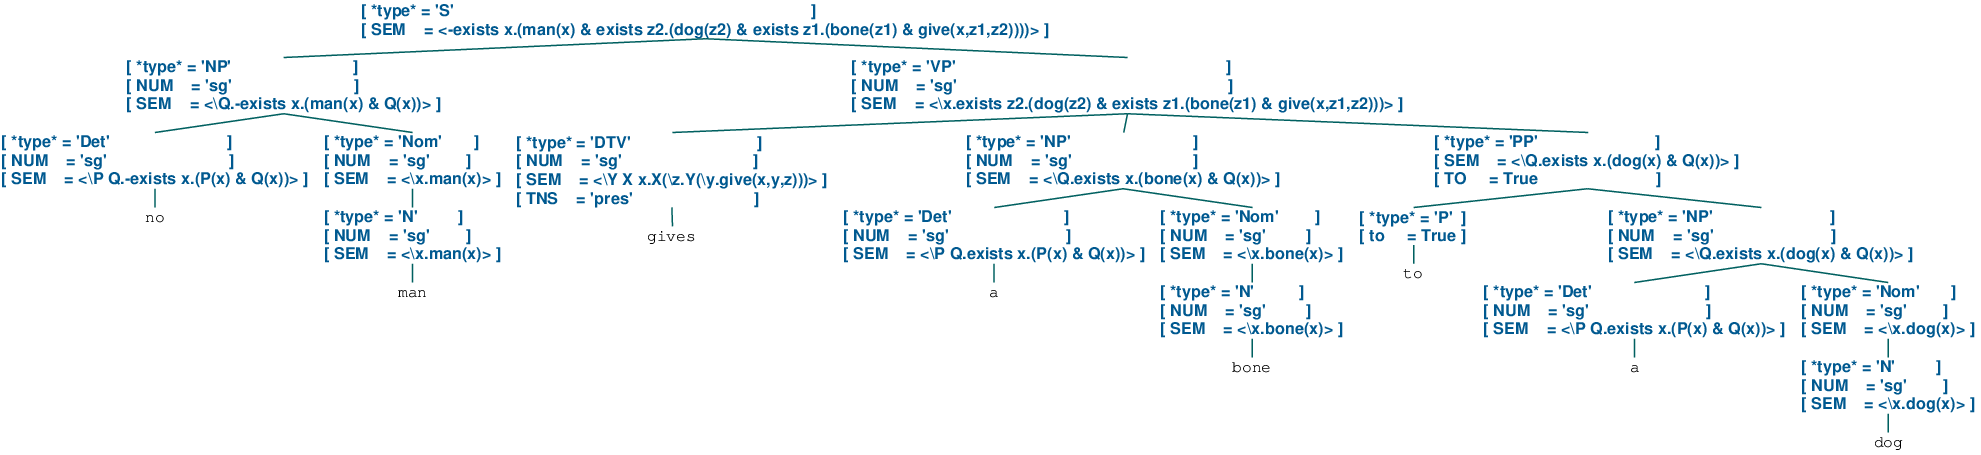

----

$-\exists\ x.(man(x)\ \land\ \exists\ z_{4}.(man(z_{4})\ \land\ dog(z_{4})\ \land\ \exists\ z_{3}.(bone(z_{3})\ \land\ give(x,z_{3},z_{4}))))$

Fontconfig error: Cannot load default config file: No such file: (null)
Fontconfig error: Cannot load default config file: No such file: (null)


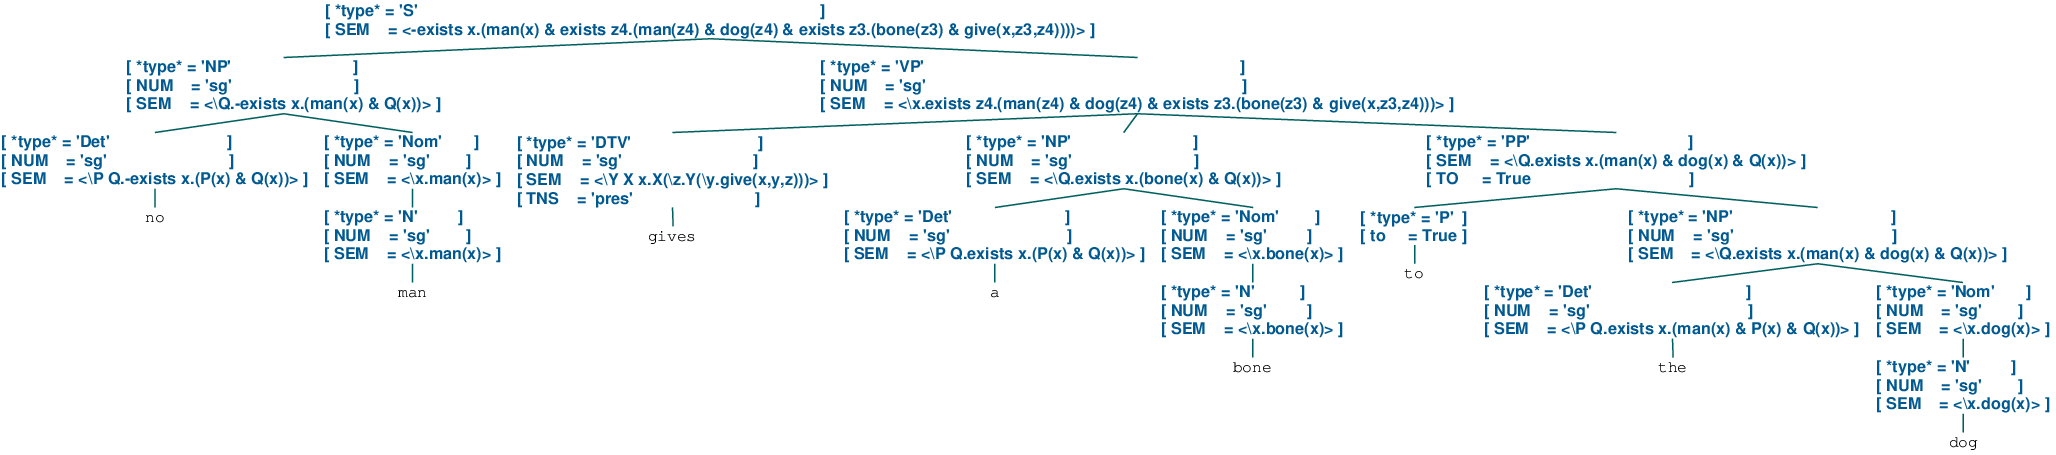

----

$?conj2(\lambda\ Q.\exists\ x.(boy(x)\ \land\ Q(x)),\lambda\ Q.\exists\ x.(girl(x)\ \land\ Q(x)),\lambda\ x.\forall\ z_{5}.(dog(z_{5})\ \rightarrow\ chase(x,z_{5})))$

Fontconfig error: Cannot load default config file: No such file: (null)
Fontconfig error: Cannot load default config file: No such file: (null)


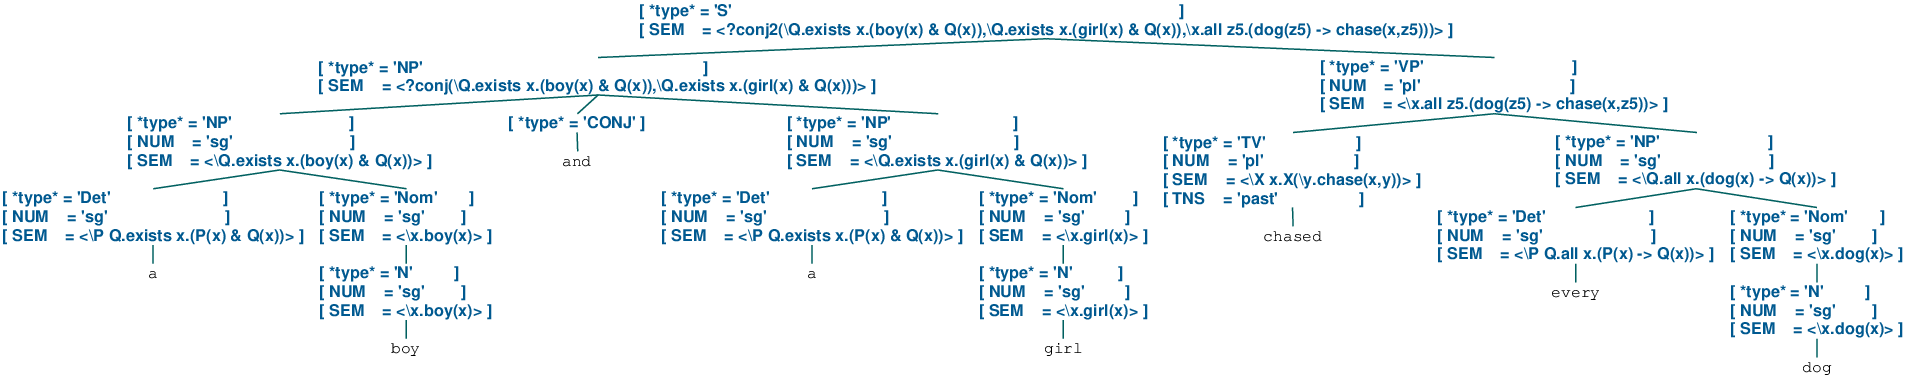

----

$?conj2(\lambda\ Q.\exists\ x.(boy(x)\ \land\ Q(x)),\lambda\ Q.\exists\ x.(girl(x)\ \land\ Q(x)),\lambda\ x.\forall\ z_{5}.(dog(z_{5})\ \rightarrow\ chase(x,z_{5})))$

Fontconfig error: Cannot load default config file: No such file: (null)
Fontconfig error: Cannot load default config file: No such file: (null)


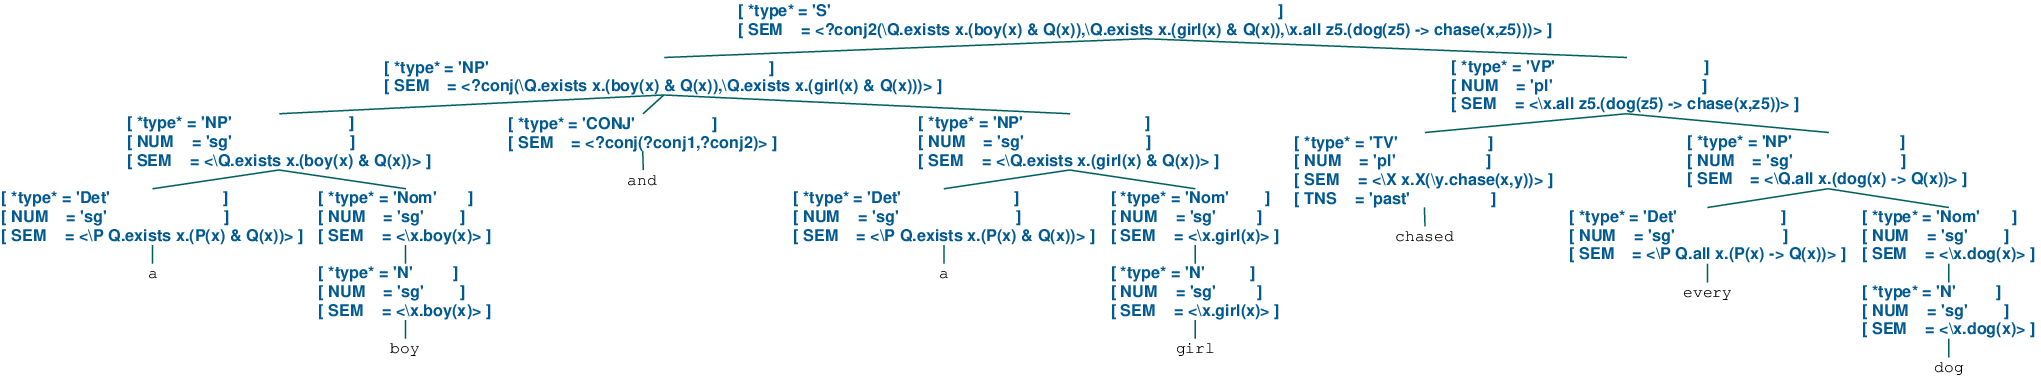

----

$\exists\ x.(cat(x)\ \land\ \exists\ z_{7}.(dog(z_{7})\ \land\ chase(x,z_{7})))$

Fontconfig error: Cannot load default config file: No such file: (null)
Fontconfig error: Cannot load default config file: No such file: (null)


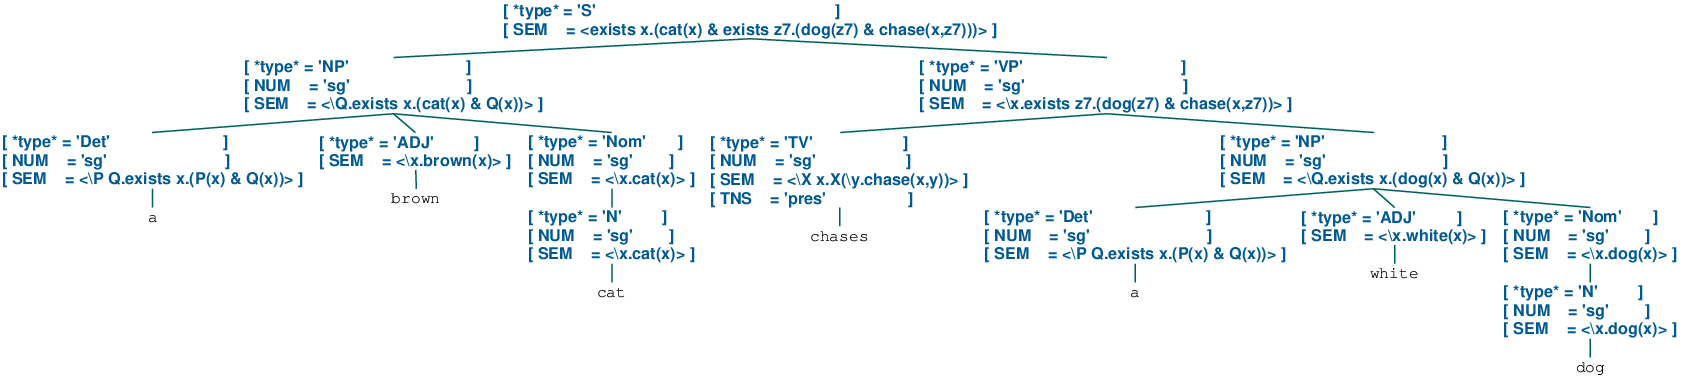

In [12]:
# comment out sentences if you couldn't find an answer for them
nltk.data.clear_cache()
sentences = [
    'no man gives a bone to a dog',
    'no man gives a bone to the dog',
    'a boy and a girl chased every dog',
    'every dog chased a boy and a girl',
    'a brown cat chases a white dog',
]
for results in nltk.interpret_sents(sentences, syntax):
    for (synrep, semrep) in results:
        display(Markdown('----'))
        display_latex(semrep) # prints the SEM feature of a tree
        display_tree(synrep) # show the parse tree

If you are working with iPython which is also running behind Jupyter notebooks and you are changing grammars and want to rerun a new version without restarting you may find `nltk.data.clear_cache()` useful.

We ended up just copying the whole grammar and adding our rules it (in the same cell). 
We had a problem with displaying the tree (we think this has to do with our Windows).



## Statement of contribution

Briefly state how many times you have met for discussions, who was present, to what degree each member contributed to the discussion and the final answers you are submitting.

We had a three-hour long discord call with all of our group members (group 4: Eleni, Victoria, Marie, Anni), everyone contributed equally. Then we worked on the improvements together for a few hours after the programming session on the 4th of April.

<div class="comment">
All are correct execept for (3) and (4) which use the conj rule -- what you have in the answer is very close.
    
It's much easier to debug these if you can get the tree printing working because then you can track the beta reductions up the tree and see what went wrong. I had to install ghostscript and the tkinker python package to get it to work.
</div>

## Marks

The assignment is marked on a 7-level scale where 4 is sufficient to complete the assignment; 5 is good solid work; 6 is excellent work, covers most of the assignment; and 7: creative work. 

This assignment has a total of 47 marks. These translate to grades as follows: 1 = 17% 2 = 34%, 3 = 50%, 4 = 67%, 5 = 75%, 6 = 84%, 7 = 92% where %s are interpreted as lower bounds to achieve that grade.

<div class="comment">
Total: 35/47 => 4/7
</div>